# Inverted-pendulum

In [5]:
import sys
sys.path = ['..'] + sys.path
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import plot_mean_ci, plot_all
from baselines.common.sacred_utils import load_runs, filter_runs

In [6]:
runs = load_runs('../sacred_runs/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))
trpo_runs = load_runs('../trpois/')
print("Loaded trpo runs:", len(trpo_runs.keys()))

Loaded runs: 645
Loaded final runs: 360
Loaded trpo runs: 45


In [7]:
# Merge the runs
total_runs = {}
for key, value in runs.items():
    total_runs[str(key) + '-base'] = value
for key, value in final_runs.items():
    total_runs[str(key) + '-final'] = value
for key, value in trpo_runs.items():
    total_runs[str(key) + '-trpo'] = value

In [25]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 0.99,
    'config.clipping': False,
    'config.njobs': 1,
    'config.natural': False,
    'config.policy': 'linear',
    'config.iw_norm': 'none'
}

## Increasing delta for linear policies

----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 10
Seeds: 109, 570, 10, 160, 904, 109, 904, 10, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 10
Seeds: 109, 160, 570, 10, 904, 10, 160, 904, 109, 570
----------------------------------------
Method: pdis  - Delta: 0.999999999999
Experiments: 5
Seeds: 904, 160, 109, 570, 10
----------------------------------------
Method: pdis  - Delta: 1.0
Experiments: 5
Seeds: 904, 10, 109, 160, 570


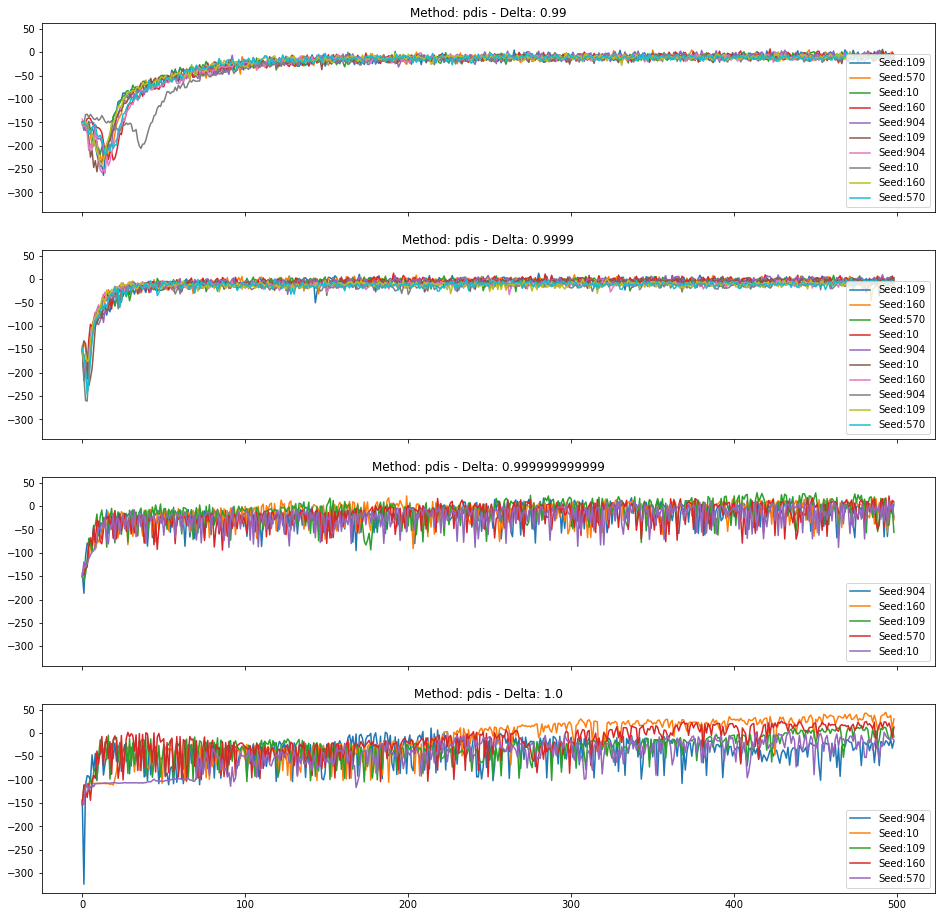

In [31]:
N = 4
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.99), 
                                              ('pdis', 'pdis-max-d2', 0.9999),
                                              ('pdis', 'pdis-max-d2', 0.999999999999),
                                              ('pdis', 'pdis-max-d2', 1.0),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'zeros'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Switch to non-linear policies

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: dict_keys(['804-base', '835-base', '813-base', '822-base', '837-base', '336-final', '362-final', '354-final', '351-final', '342-final'])
Seeds: 570, 10, 160, 109, 904, 109, 160, 570, 10, 904
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: dict_keys(['832-base', '833-base', '838-base', '809-base', '808-base', '331-final', '352-final', '364-final', '361-final', '366-final'])
Seeds: 10, 160, 109, 904, 570, 10, 160, 570, 109, 904
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: dict_keys(['829-base', '811-base', '823-base', '840-base', '825-base', '341-final', '359-final', '356-final', '360-final', '334-final'])
Seeds: 109, 904, 10, 570, 160, 570, 160, 904, 10, 109
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: dict_keys(['337-final', '347-final', '357-final', '345-final', '343-final'])
Seeds: 160, 10, 904, 5

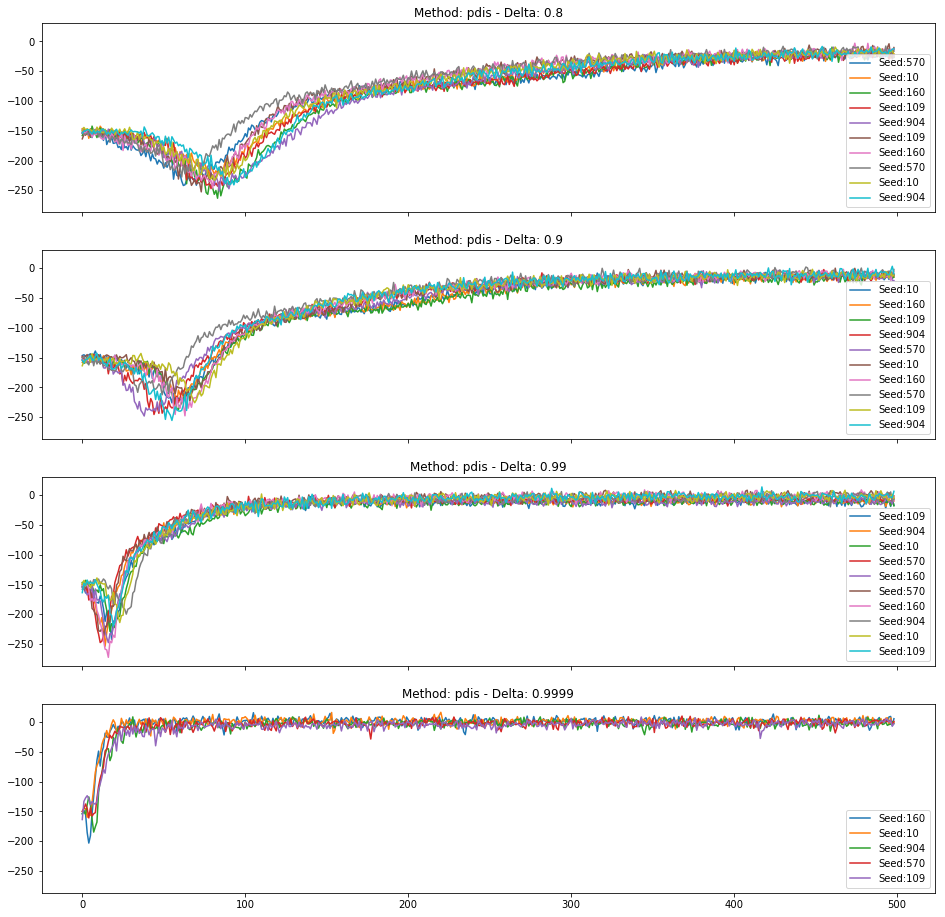

In [52]:
N = 4
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", filtered_runs.keys())
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Xavier init

----------------------------------------
Method: pdis  - Delta: 0.8
Experiments: 5
Seeds: 109, 904, 570, 160, 10
----------------------------------------
Method: pdis  - Delta: 0.9
Experiments: 10
Seeds: 904, 10, 160, 570, 109, 10, 904, 109, 160, 570
----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 109, 10, 570, 160, 904


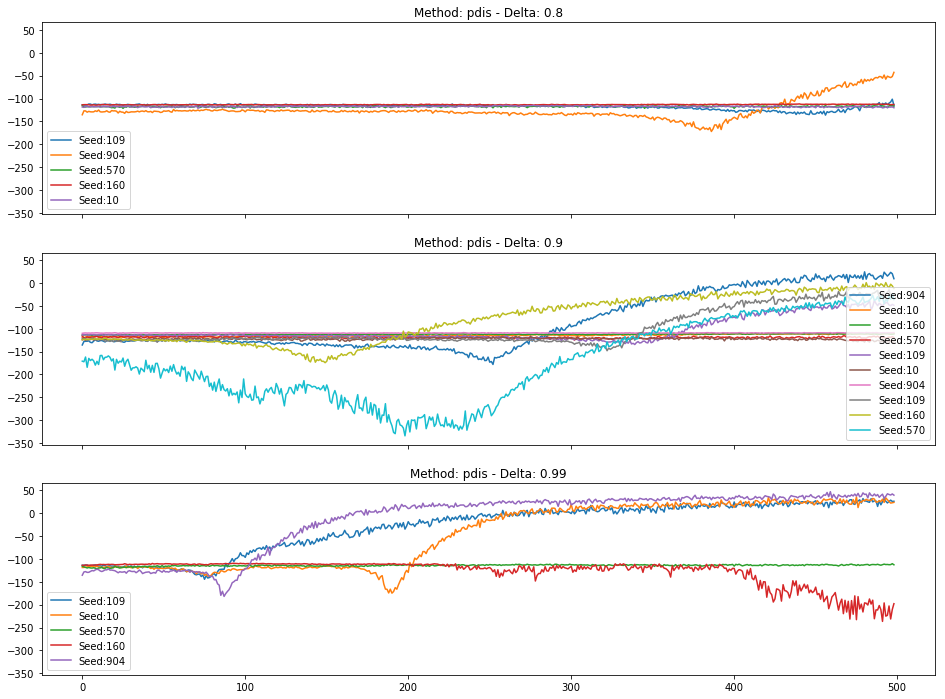

In [33]:
N = 3
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.8), 
                                              ('pdis', 'pdis-max-d2', 0.9),
                                              ('pdis', 'pdis-max-d2', 0.99),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'xavier',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

## Mean reward bound

----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 160, 570, 109, 10, 904
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 10, 570, 904, 109, 160


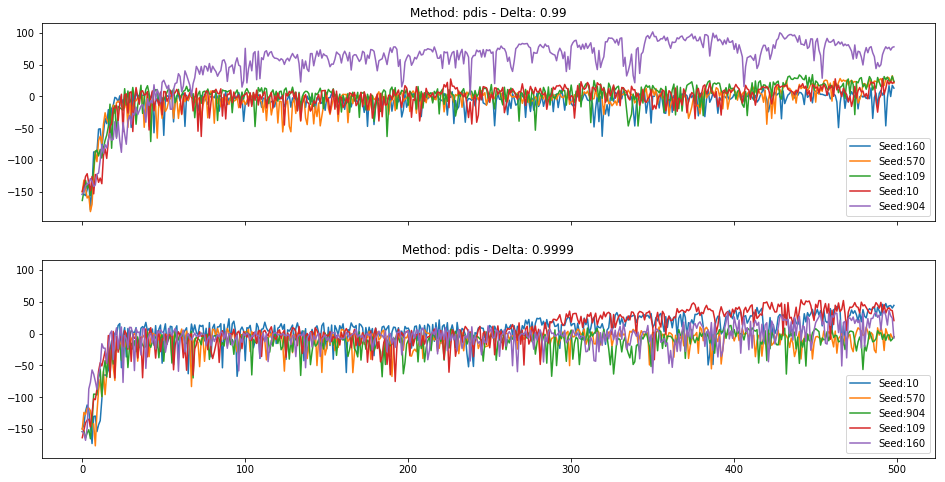

In [26]:
N = 2
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-mean-d2', 0.99),
                                              ('pdis', 'pdis-mean-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn'
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
    #axis[i].set_ylim(-100, 100)
plt.show();

## GAMMA ONE

----------------------------------------
Method: pdis  - Delta: 0.99
Experiments: 5
Seeds: 160, 904, 109, 10, 570
----------------------------------------
Method: pdis  - Delta: 0.9999
Experiments: 5
Seeds: 109, 904, 10, 160, 570


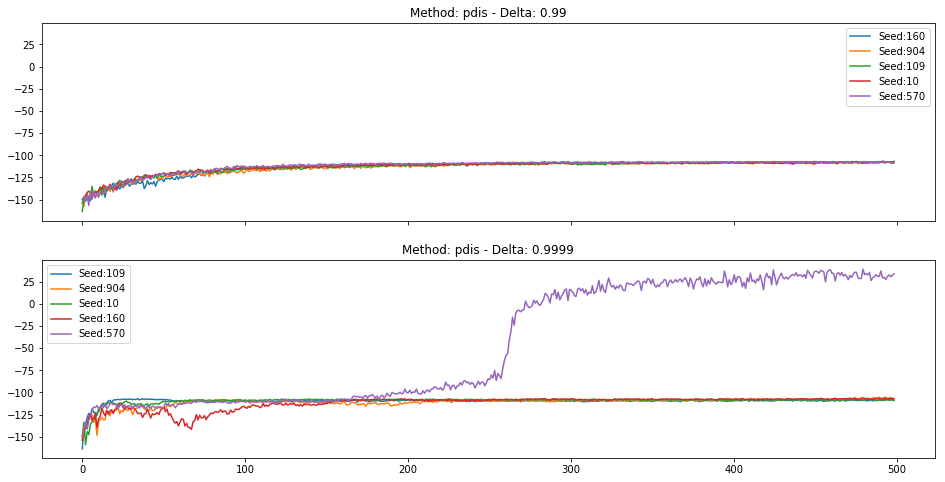

In [27]:
N = 2
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.99),
                                              ('pdis', 'pdis-max-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn',
        'config.entropy': 'step:0.1:200',
        'config.gamma': 1.0
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
    #axis[i].set_ylim(-100, 100)
plt.show();

----------------------------------------
Method: pdis  - Delta: 0.999999
Experiments: 5
Seeds: 160, 904, 570, 10, 109
----------------------------------------
Method: pdis  - Delta: 1.0
Experiments: 5
Seeds: 160, 904, 570, 109, 10


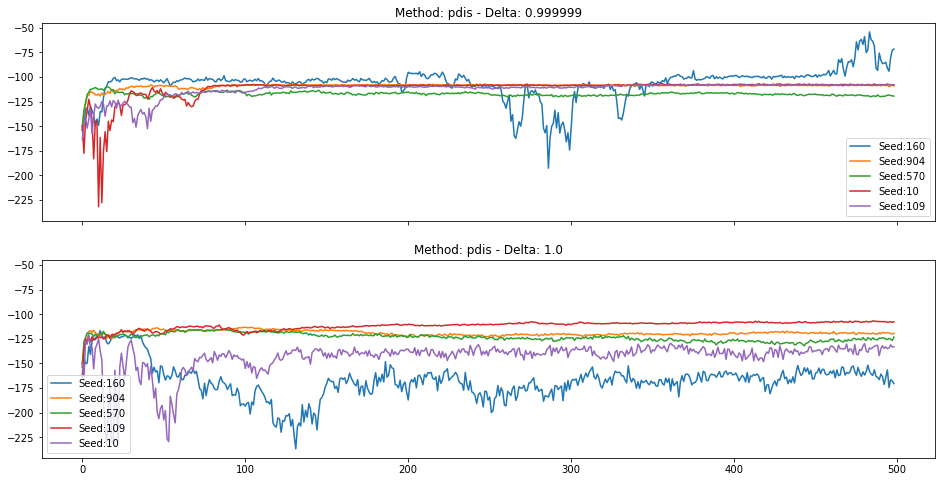

In [28]:
N = 2
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.999999),
                                              ('pdis', 'pdis-max-d2', 1.0),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn',
        'config.entropy': 'none',
        'config.center': True,
        'config.gamma': 1.0
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
    #axis[i].set_ylim(-100, 100)
plt.show();

----------------------------------------
Method: pdis-gammaone  - Delta: 0.9999
Experiments: 5
Seeds: 904, 109, 570, 160, 10
----------------------------------------
Method: pdis-gammaone  - Delta: 0.9999
Experiments: 5
Seeds: 904, 109, 570, 160, 10


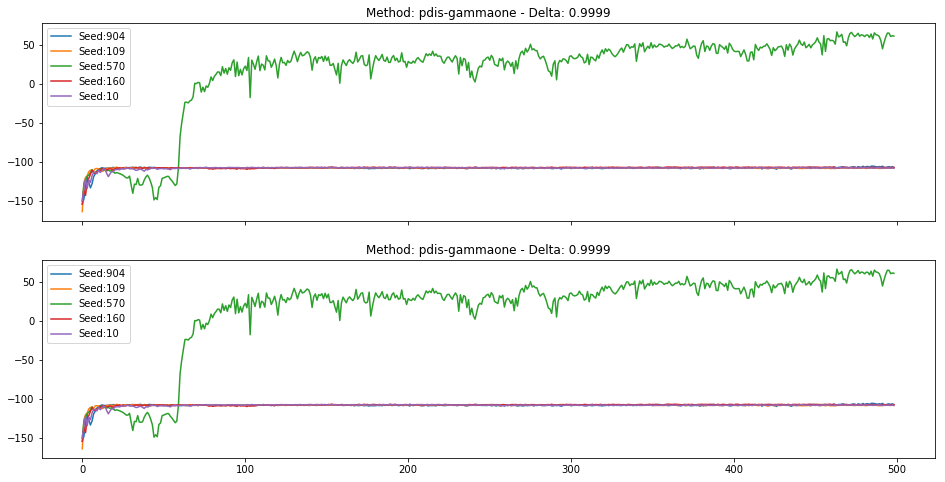

In [33]:
N = 2
fig, axis = plt.subplots(nrows=N, ncols=1, figsize=(16,4*N), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis-gammaone', 'pdis-max-d2', 0.9999),
                                              ('pdis-gammaone', 'pdis-max-d2', 0.9999),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100,
        'config.policy_init': 'small-weights',
        'config.policy': 'simple-nn',
        'config.entropy': 'none',
        'config.center': False,
        'config.gamma': 0.99
    }
    filtered_runs = filter_runs({**base_query, **query}, total_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
    #axis[i].set_ylim(-100, 100)
plt.show();